In [1]:
%run imports.py
import mne
from pathlib import Path

Succesfully imported libraries and modules



In [8]:
with open('path_data.txt', 'r') as f:
    data_path = Path(f.readline())

    
SFREQ = 2000
data_path

WindowsPath('C:/Users/aleks/Downloads/data_pac')

In [9]:
patient_path = data_path / 'Patient7'
patient_path

WindowsPath('C:/Users/aleks/Downloads/data_pac/Patient7')

In [10]:
fname = "Akhmetshin_OFF_5_eyes_closed_marked_bip.fif"

In [11]:
good_durations = []

for i_patient in [7, 8, 9]:
    patient_path = data_path / f"Patient{i_patient}"
    for fname in [f for f in patient_path.iterdir()]:
        if "eyes_closed" in str(fname):
            print(fname)
            fpath = patient_path / fname
            raw = mne.io.read_raw_fif(fpath, verbose='ERROR')
            print("Duration: ", len(raw) / SFREQ)
            data = raw.get_data(reject_by_annotation='omit')
            print(data.shape)
            good_durations.append(data.shape[1] / SFREQ)
            print("Good segment duration: ", data.shape[1] / SFREQ)
            
good_durations = np.array(good_durations)
print(np.sum(good_durations < 180))

C:\Users\aleks\Downloads\data_pac\Patient7\Akhmetshin_OFF_1_eyes_closed_marked_bip.fif
Duration:  277.854
(62, 555708)
Good segment duration:  277.854
C:\Users\aleks\Downloads\data_pac\Patient7\Akhmetshin_OFF_5_eyes_closed_marked_bip.fif
Duration:  212.753
(62, 401526)
Good segment duration:  200.763
C:\Users\aleks\Downloads\data_pac\Patient7\Akhmetshin_ON_1_eyes_closed_marked_bip.fif
Duration:  368.204
(62, 624168)
Good segment duration:  312.084
C:\Users\aleks\Downloads\data_pac\Patient7\Akhmetshin_ON_5_eyes_closed_marked_bip.fif
Duration:  320.579
(62, 478218)
Good segment duration:  239.109
C:\Users\aleks\Downloads\data_pac\Patient8\Boyko_OFF_1_eyes_closed_marked_bip.fif
Duration:  312.329
(62, 624658)
Good segment duration:  312.329
C:\Users\aleks\Downloads\data_pac\Patient8\Boyko_OFF_5_eyes_closed_marked_bip.fif
Duration:  330.752
(62, 651344)
Good segment duration:  325.672
C:\Users\aleks\Downloads\data_pac\Patient8\Boyko_ON_1_eyes_closed_marked_bip.fif
Duration:  283.454
(62, 5

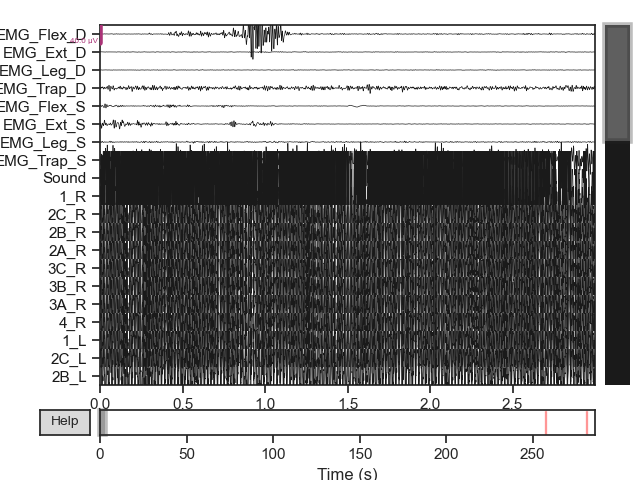

In [12]:
%matplotlib widget
raw.plot(duration=3);

In [13]:
print(len(raw))

np.shape(raw.get_data())

571858


(62, 571858)

1. Create a patient object with empty LFP and PAC
2. Loop through MNE files for the patient (eyes closed), extract data
3. Loop through the bipolar channel data
4. Create LFP + preprocess
5. Assign LFP to the patient

In [14]:
raw.info.ch_names[-30:]

['1-2C_R',
 '1-2B_R',
 '1-2A_R',
 '2C-2B_R',
 '2B-2A_R',
 '2A-2C_R',
 '2C-3C_R',
 '2B-3B_R',
 '2A-3A_R',
 '3C-3B_R',
 '3B-3A_R',
 '3A-3C_R',
 '4-3C_R',
 '4-3B_R',
 '4-3A_R',
 '1-2C_L',
 '1-2B_L',
 '1-2A_L',
 '2C-2B_L',
 '2B-2A_L',
 '2A-2C_L',
 '2C-3C_L',
 '2B-3B_L',
 '2A-3A_L',
 '3C-3B_L',
 '3B-3A_L',
 '3A-3C_L',
 '4-3C_L',
 '4-3B_L',
 '4-3A_L']

In [48]:
# create Patient object
SFREQ = 2000
patients = []

for i_patient in [7, 8, 9]:

    patient_name = f"Patient{i_patient}"
    patient_dir = data_path / patient_name
    print(patient_dir)

    patient = Patient(patient_name, patient_dir, sampling_frequency=SFREQ)
    patient.conditions = set(["1Day OFF Rest", "1Day ON Rest", "5Day OFF Rest", "5Day ON Rest"])
    # changing channel names into the standard ones (L2A-3A)
    ch_names = raw.info.ch_names[-30:]
    get_new_name = lambda s: s.split("_")[1] + s.split("_")[0] # 'L' + "2A-3A"
    sorted_placements = list(map(get_new_name, ch_names))
    patient.sorted_placements = sorted_placements
    patient.placements = set(sorted_placements)

    print(patient.sorted_placements)

    for fpath in patient_dir.iterdir():
        patient.add_file(fpath.name)

    print(patient.files)
    patients.append(patient)

C:\Users\aleks\Downloads\data_pac\Patient7
List of things to make sure before analysis: 
1) .bdf files are in patient folder (root_dir)
2) annotation files share the same name as .bdf files but with _annotations.txt suffix
3) annotations share the same naming principle: e.g. 1Day OFF RH (Com)
['R1-2C', 'R1-2B', 'R1-2A', 'R2C-2B', 'R2B-2A', 'R2A-2C', 'R2C-3C', 'R2B-3B', 'R2A-3A', 'R3C-3B', 'R3B-3A', 'R3A-3C', 'R4-3C', 'R4-3B', 'R4-3A', 'L1-2C', 'L1-2B', 'L1-2A', 'L2C-2B', 'L2B-2A', 'L2A-2C', 'L2C-3C', 'L2B-3B', 'L2A-3A', 'L3C-3B', 'L3B-3A', 'L3A-3C', 'L4-3C', 'L4-3B', 'L4-3A']
{'Akhmetshin_OFF_5_eyes_closed_marked_bip.fif', 'Akhmetshin_OFF_1_eyes_opened_marked_bip.fif', 'Akhmetshin_OFF_1_eyes_closed_marked_bip.fif', 'Akhmetshin_ON_5_eyes_opened_marked_bip_cropped.fif', 'Akhmetshin_OFF_5_eyes_opened_marked_bip.fif', 'Akhmetshin_ON_1_eyes_closed_marked_bip.fif', 'Akhmetshin_ON_5_eyes_closed_marked_bip.fif', 'Patient7.pkl', 'Akhmetshin_ON_5_eyes_opened_marked_bip.fif', 'Akhmetshin_ON_1_eye

In [49]:
# prepare LFPs and save patient
for patient in patients:
    for f in patient.root_dir.iterdir():
        print(f.name)
        if 'eyes_closed' in f.name:
            name, ldopa, day = f.name.split('_')[:3]
            raw = mne.io.read_raw_fif(f, verbose='ERROR')
            print("Duration: ", len(raw) / SFREQ)
            data = raw.get_data(reject_by_annotation='omit')
            print(data.shape)
            condition = create_condition_name(f"{day}Day", ldopa, "Rest")
            print(condition)
            for i_chan in range(len(patient.placements)):
                placement = patient.sorted_placements[i_chan]
                data_lfp = data[i_chan, :]
                lfp = LFP(data_lfp, 
                          sampling_frequency=SFREQ,
                          patient_name=patient.name, 
                          condition=condition, 
                          placement=placement)
                
                lfp.remove_50hz_harmonics(70, inplace=True)
                lfp.bp_filter(4, 999, inplace=True, filter_order=3)

                patient.add_lfp(lfp, verbose=False)
            patient.merge_conditions([condition], condition + " 180sec", total_duration=180, remove_merged=True)
    patient.save()

Akhmetshin_OFF_1_eyes_closed_marked_bip.fif
Duration:  277.854
(62, 555708)
1Day OFF Rest
Adding LFP to Patient7 object. 
Condition: 1Day OFF Rest 180sec 
Placement: R2A-3A
Updating condition
Akhmetshin_OFF_1_eyes_opened_marked_bip.fif
Akhmetshin_OFF_5_eyes_closed_marked_bip.fif
Duration:  212.753
(62, 401526)
5Day OFF Rest
Adding LFP to Patient7 object. 
Condition: 5Day OFF Rest 180sec 
Placement: R2A-3A
Updating condition
Akhmetshin_OFF_5_eyes_opened_marked_bip.fif
Akhmetshin_ON_1_eyes_closed_marked_bip.fif
Duration:  368.204
(62, 624168)
1Day ON Rest
Adding LFP to Patient7 object. 
Condition: 1Day ON Rest 180sec 
Placement: R2A-3A
Updating condition
Akhmetshin_ON_1_eyes_opened_marked_bip.fif
Akhmetshin_ON_5_eyes_closed_marked_bip.fif
Duration:  320.579
(62, 478218)
5Day ON Rest
Adding LFP to Patient7 object. 
Condition: 5Day ON Rest 180sec 
Placement: R2A-3A
Updating condition
Akhmetshin_ON_5_eyes_opened_marked_bip.fif
Akhmetshin_ON_5_eyes_opened_marked_bip_cropped.fif
Patient7.pkl


In [50]:
patient.conditions

{'1Day OFF Rest 180sec',
 '1Day ON Rest 180sec',
 '5Day OFF Rest 180sec',
 '5Day ON Rest 180sec'}

In [25]:
condition = '1Day OFF Rest 180sec'
placement = "4-3B_L"

In [31]:
lfp = patient.lfp[condition][placement]

In [37]:
patient.save()

Saving Patient8 object to C:\Users\aleks\Downloads\data_pac\Patient8\Patient8.pkl ...
Pickling Patient8 without ['pac']
Done, 0.29325437545776367 sec
File size: 329.60868549346924 MB
Returning filepath for saved file


'C:\\Users\\aleks\\Downloads\\data_pac\\Patient8\\Patient8.pkl'

In [51]:
cross_placements = ["L4-3A", "L4-3B", "L4-3C", "L2A-3A", "L2B-3B", "L2C-3C", "L1-2A", "L1-2B", "L1-2C", "R4-3A", "R4-3B", "R4-3C", "R2A-3A", "R2B-3B", "R2C-3C", "R1-2A", "R1-2B", "R1-2C"]

In [52]:
for p in cross_placements:
    print(p in patient.placements)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
